In [2]:
#import modules
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

print("All imports work!")



All imports work!


In [3]:
#import csv file
#url = "https://github.com/DAVE3625/Dave3625-Host-2025/blob/main/Lab2/data/stud.csv"
df = pd.read_csv("./data./stud.csv")


In [4]:

#Read the csv, notice sep=','.. For CSV files created in Norwegian excel we need to use sep=';'#
#df = pd.read_csv(url, na_values=' ') #You can use this for automatically convert blank space to nan values
#df = pd.read_csv(url, sep=',')

df.head()

,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0


In [5]:
df.describe()

,StudentID,FinalGrade
count,50.000000,49.000000
mean,48969.820000,71.653061
std,26870.066326,90.455917
min,10736.000000,24.000000
25%,26666.500000,39.000000
50%,44292.000000,60.000000
75%,70400.250000,78.000000
max,99823.000000,673.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   50 non-null     int64  
 1   Age         50 non-null     object 
 2   email       50 non-null     object 
 3   hrsStudy    50 non-null     object 
 4   FinalGrade  49 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.1+ KB


In [7]:
df

,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0
5,88403,29,s88403@oslomet.no,11,62.0
6,56387,32,s56387@oslomet.no,9,29.0
7,95648,23,s95648@oslomet.no,3,38.0
8,63176,20,s63176@oslomet.no,0,98.0
9,15406,31,s15406@oslomet.no,2,68.0


In [8]:
#lets see how many empty cells we got
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    1
dtype: int64

In [9]:
#Lets first replace all empty cells wit np.nan
df=df.replace(r'^\s*$', np.nan, regex=True)
#and check again
df.isna().sum()

StudentID     0
Age           1
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [10]:
#When dealing with missing values, we need to make to figure out if we can replace data
#with dummy values. Lets say Age isn't too important in this dataset, and we can replace missing
#age values with 0

df["Age"].replace(np.nan, 0, inplace=True)
#df = df['Age'].astype(str).astype(int)

C:\Users\Bruker\AppData\Local\Temp\ipykernel_10272\18981390.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].replace(np.nan, 0, inplace=True)


In [11]:
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [12]:
#Since we believe the rest of the columns contains important data, we won't replace nan values with dummy data
#We will therefor delete rows containing nan data
df.dropna(inplace = True)
# inplace = True updates the df with the new data, alternative you can do df = df.dropna() or Newdf = df.dropna()
#And lets check again
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    0
dtype: int64

In [13]:
#A easy way to convert object to int is thorugh string so we convert all values to strings then ints
df['Age'] = df['Age'].astype(str).astype(int)
df['hrsStudy'] = df['hrsStudy'].astype(str).astype(int)

In [14]:
#so lets see then..
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   48 non-null     int64  
 1   Age         48 non-null     int64  
 2   email       48 non-null     object 
 3   hrsStudy    48 non-null     int64  
 4   FinalGrade  48 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.2+ KB


,StudentID,Age,hrsStudy,FinalGrade
count,48.000000,48.000000,48.000000,48.000000
mean,50338.166667,35.666667,6.395833,72.083333
std,26526.981827,52.388619,3.648022,91.362461
min,11758.000000,0.000000,0.000000,24.000000
25%,28399.750000,22.000000,3.000000,38.750000
50%,45986.500000,25.000000,7.000000,61.000000
75%,71524.000000,31.000000,10.000000,78.500000
max,99823.000000,333.000000,11.000000,673.000000


If your dataset is complete, you won't have to do all this, but its always smart to check that you get the expected datatypes when reading a file

Converting values from int to float can be done by df[list("Age")] = df[list("Age")].astype(float)

<Axes: >

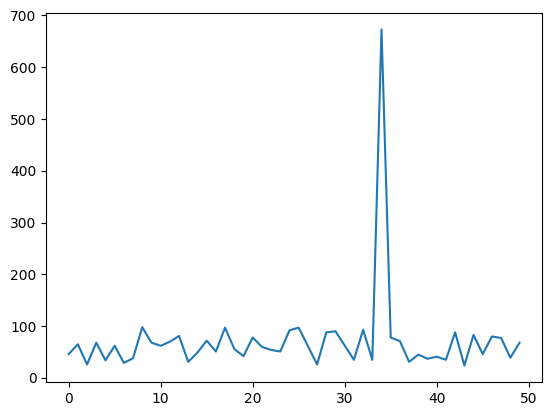

In [15]:
#We can now start to look for values that might be wrong.
#An example for FinalGrade, we see from df.describe() that the max value is 673, this is clearly wrong
#A way to visualize this is to do a plot

df["FinalGrade"].plot.line()


<Axes: >

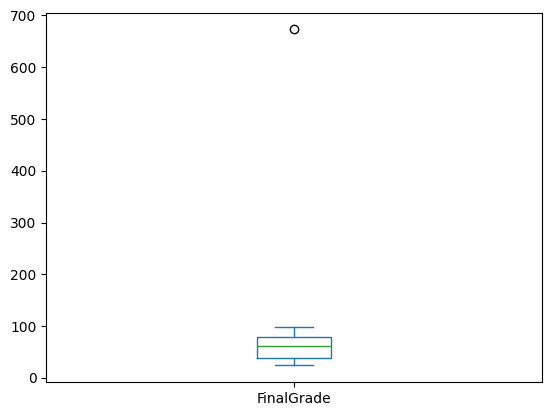

In [16]:
df["FinalGrade"].plot.box()

In [17]:
#We will look closer at removing outliers later, but we can remove them using the scipy package
#Calculate the z score

z_scores = stats.zscore(df["FinalGrade"])
abs_z_scores = np.abs(z_scores)


In [18]:
#We will look closer at removing outliers later, but we can remove them using the scipy package
#Calculate the z score

df.drop(df[abs_z_scores > 3].index, inplace=True)

<Axes: >

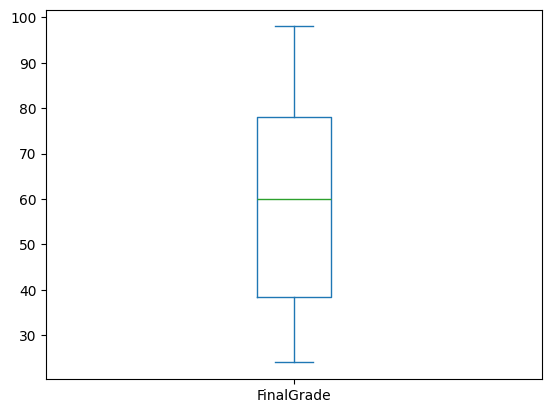

In [19]:
#checking the column again to see if outliners are gone..
df["FinalGrade"].plot.box()

In [20]:
#lets take a look at the end of our dataframe
df.tail(5)

,StudentID,Age,email,hrsStudy,FinalGrade
45,62039,23,s62039@oslomet.no,4,46.0
46,42989,27,s42989@oslomet.no,0,80.0
47,85370,29,s85370@oslomet.no,2,77.0
48,63135,26,s63135@oslomet.no,9,39.0
49,28895,19,s28895@oslomet.no,10,68.0


In [21]:
#s you van see, the index counts to 49, but we have dropped several values.. to reset the indec you can use
df = df.reset_index(drop=True)
df.tail(5)

,StudentID,Age,email,hrsStudy,FinalGrade
42,62039,23,s62039@oslomet.no,4,46.0
43,42989,27,s42989@oslomet.no,0,80.0
44,85370,29,s85370@oslomet.no,2,77.0
45,63135,26,s63135@oslomet.no,9,39.0
46,28895,19,s28895@oslomet.no,10,68.0


Lets add a collumn where we translate the numeric grade to a A-F scale

In [ ]:
# create a list of our conditions

conditions = [
    (df['FinalGrade'] <= 50.0),
    (df['FinalGrade'] > 50.0) & (df['FinalGrade'] <= 60.0),
    (df['FinalGrade'] > 60.0) & (df['FinalGrade'] <= 70.0),
    (df['FinalGrade'] > 70.0) & (df['FinalGrade'] <= 80.0),
    (df['FinalGrade'] > 80.0) & (df['FinalGrade'] <= 90.0),
    (df['FinalGrade'] > 90.0)
    ]

# create a list of the values we want to assign for each condition
values = ['F', 'E', 'D', 'C', 'B', 'A']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Grade'] = np.select(conditions, values, default='') #default used if no conditons matches

# display updated DataFrame
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade,Grade
0,47412,20,s47412@oslomet.no,5,46.0,F
1,15077,22,s15077@oslomet.no,0,65.0,D
2,15467,27,s15467@oslomet.no,1,26.0,F
3,17907,21,s17907@oslomet.no,6,68.0,D
4,13352,333,s13352@oslomet.no,4,34.0,F


In [ ]:

#We can now see how many got the different grades by using groupby
df_gradeCount = df.groupby('Grade').count()
# This means all rows with the same Grade will be grouped together

In [ ]:
# Access the 'FinalGrade' column of the grouped DataFrame
# This gives you a Series showing the count of students per Grade
df_gradeCount.FinalGrade

Grade
A     5
B     5
C     6
D     7
E     5
F    19
Name: FinalGrade, dtype: int64

<Axes: xlabel='Grade'>

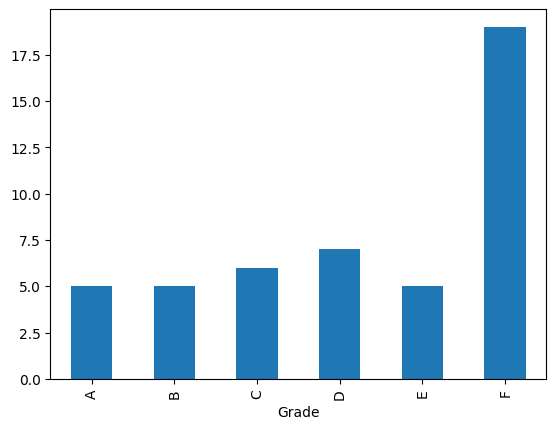

In [37]:
#and plot a barplot of the data
df_gradeCount['FinalGrade'].plot.bar()

let's have a quick look at some other plots as well

<Axes: xlabel='Age', ylabel='Grade'>

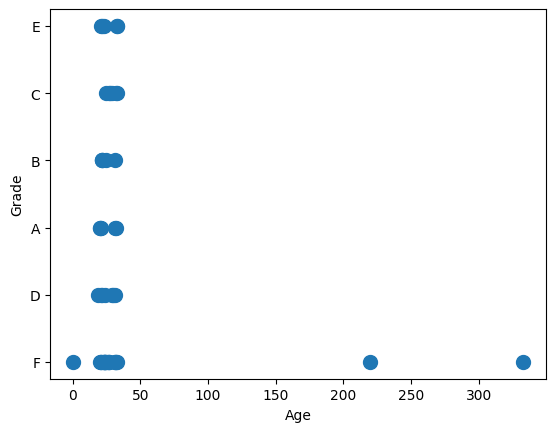

In [38]:
# Create a scatter plot from the DataFrame 'df'
# - x = 'Age'   → values from the 'Age' column go on the x-axis
# - y = 'Grade' → values from the 'Grade' column go on the y-axis
# - s = 100     → sets the size of each scatter point (default is smaller, here it's bigger at 100)
df.plot.scatter(x = 'Age', y = 'Grade', s = 100)

<Axes: xlabel='Age', ylabel='Grade'>

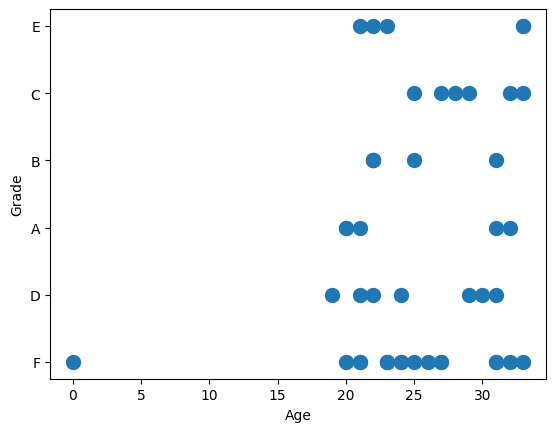

In [39]:
#lets just remove the two outliners for a micer plot

# 1. Calculate the z-scores for the 'Age' column
#    (z-score = how many standard deviations a value is from the mean)
z_scores = stats.zscore(df["Age"])

# 2. Take the absolute value of the z-scores
#    (so both very high and very low outliers are treated the same)
abs_z_scores = np.abs(z_scores)

# 3. Drop any rows where the absolute z-score is greater than 3
#    (a common threshold for considering a value an outlier)
#    inplace=True modifies the original DataFrame directly
df.drop(df[abs_z_scores > 3].index, inplace=True)

# 4. Create a scatter plot again (now without the outliers)
#    - x-axis = 'Age'
#    - y-axis = 'Grade'
#    - s=100 sets the marker size
df.plot.scatter(x = 'Age', y = 'Grade', s = 100)

create a histogram of the Age column, showing how frequently each age (or range of ages) occurs, with semi-transparent bars

<Axes: ylabel='Frequency'>

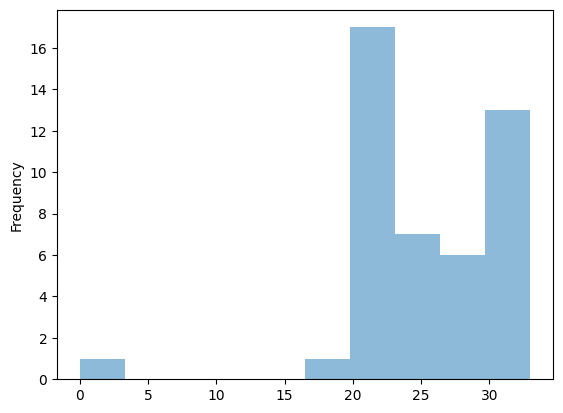

In [ ]:
df["Age"].plot.hist(alpha=0.5) #alpha sets transparency of the bars

In [ ]:
df_gradeCount["FinalGrade"].plot.area(stacked=False)

NameError: name 'Flase' is not defined